# ANN Using Pytorch 

every detail explanation is provided in pytorch org

# Loading Dataset

In [72]:
import pandas as pd
df=pd.read_csv("cardio_train.csv")

df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [73]:
# checking null values

df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [3]:
import seaborn as sns  
# this is for plotting in visuals

In [4]:
import numpy as np
df=df.drop(['id'],axis=1)
df['cardio']=np.where(df['cardio']==1,"Cardio Vascular Disorder","No Cardio Vascular Disorder ")

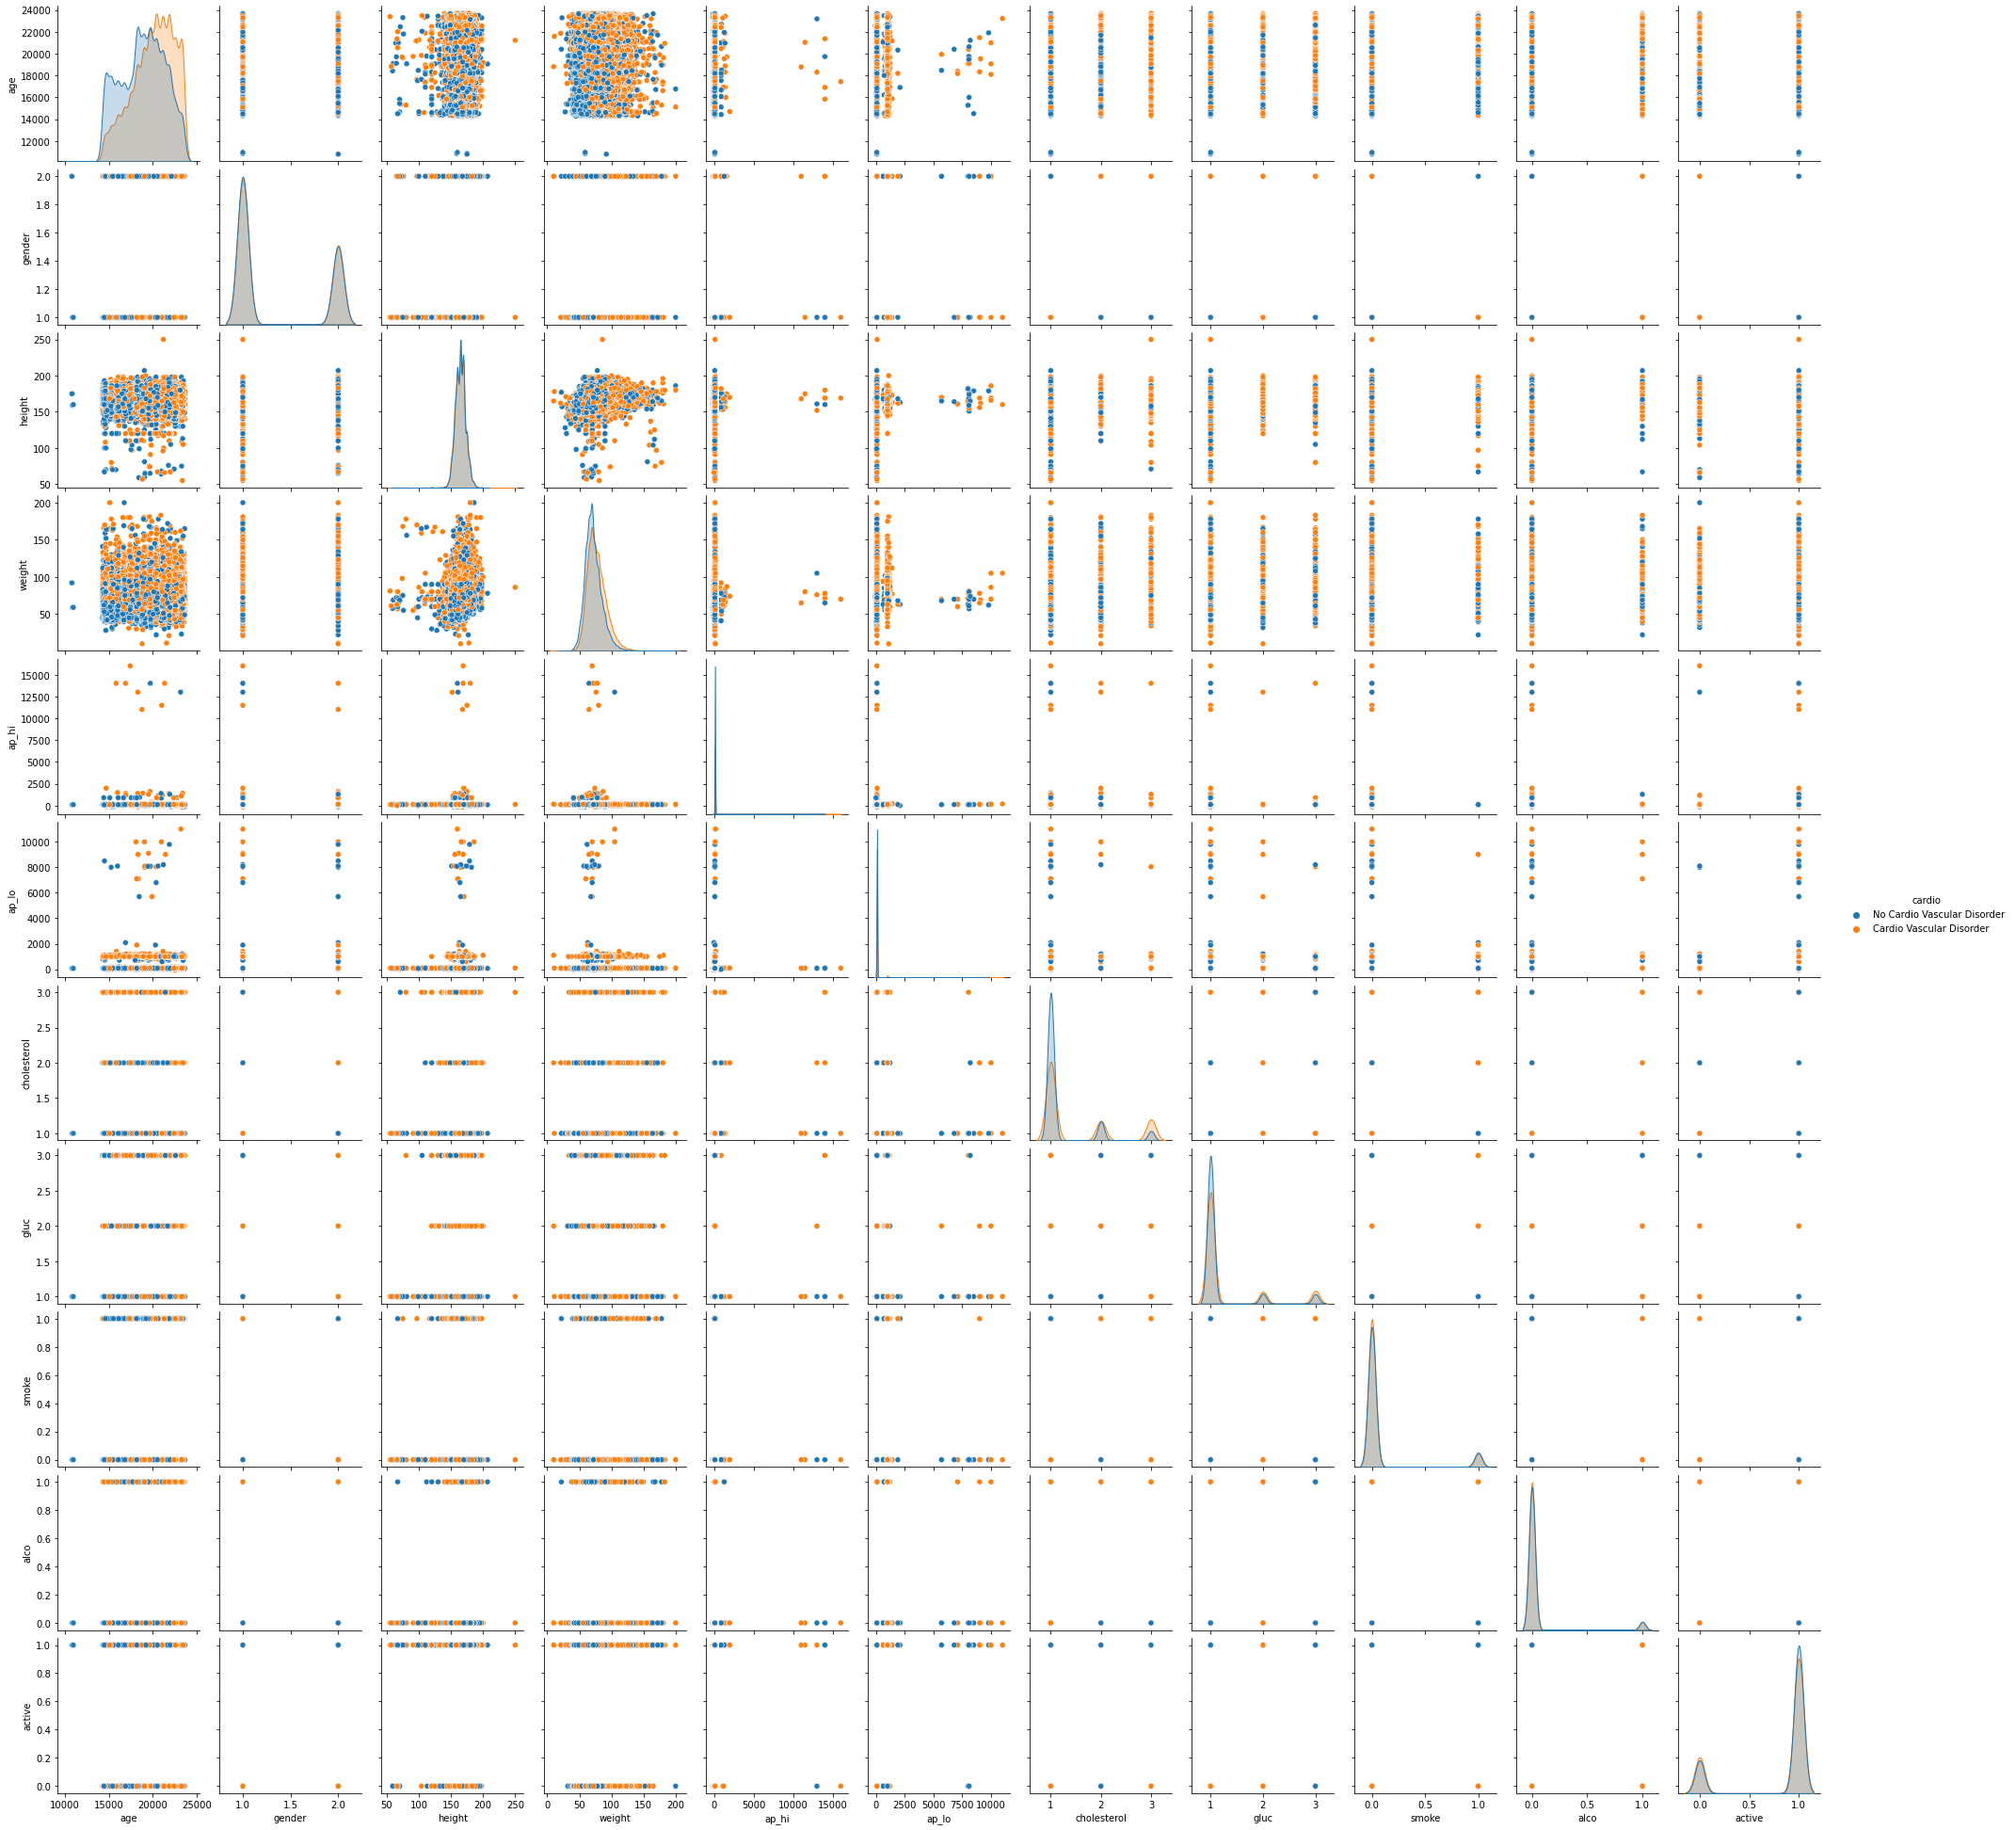

In [5]:
sns.pairplot(df,hue="cardio") # hue have dependent feature the outcome and other are independent

# Changing the outliers

In [74]:
#Systolic blood pressure
for i in range (len(df['ap_hi'])):
    if df['ap_hi'][i]<0:
        df['ap_hi'][i]=df['ap_hi'].mean()
    elif df['ap_hi'][i]> 220:
        df['ap_hi'][i]=df['ap_hi'].std()
    else:
        pass
    

C:\Users\dhruv\AppData\Local\Temp\ipykernel_11068\2284306499.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ap_hi'][i]=df['ap_hi'].std()


In [75]:
# Diastolic Blood Pressure
for i in range (len(df['ap_lo'])):
    if df['ap_lo'][i]<0:
        df['ap_lo'][i]=df['ap_lo'].mean()
    elif df['ap_lo'][i]> 140:
        df['ap_lo'][i]=df['ap_lo'].std()
    else:
        pass
    

C:\Users\dhruv\AppData\Local\Temp\ipykernel_11068\2563968739.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ap_lo'][i]=df['ap_lo'].std()


In [76]:
# Age To Years
for i in range(len(df['age'])):
    df['age'][i]=df['age'][i]/365

df['age']=np.floor(df['age'])

C:\Users\dhruv\AppData\Local\Temp\ipykernel_11068\1620579082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'][i]=df['age'][i]/365


# Removing The Outliers

In [49]:
import numpy as np

In [50]:
#Systolic blood pressure
for i in range (len(df['ap_hi'])):
    if df['ap_hi'][i]<0:
        df['ap_hi'][i]= None
    elif df['ap_hi'][i]> 220:
        df['ap_hi'][i]= None
    else:
        pass
    

C:\Users\dhruv\AppData\Local\Temp\ipykernel_11068\4023107975.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ap_hi'][i]= None


In [51]:
# Diastolic Blood Pressure
for i in range (len(df['ap_lo'])):
    if df['ap_lo'][i]<0:
        df['ap_lo'][i]=None
    elif df['ap_lo'][i]> 140:
        df['ap_lo'][i]=None
    else:
        pass
    

C:\Users\dhruv\AppData\Local\Temp\ipykernel_11068\324347646.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ap_lo'][i]=None


In [52]:
# Age To Years
for i in range(len(df['age'])):
    df['age'][i]=df['age'][i]/365

df['age']=np.floor(df['age'])

C:\Users\dhruv\AppData\Local\Temp\ipykernel_11068\1620579082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'][i]=df['age'][i]/365


In [53]:
df.isnull().sum()

id               0
age              0
gender           0
height           0
weight           0
ap_hi           55
ap_lo          984
cholesterol      0
gluc             0
smoke            0
alco             0
active           0
cardio           0
dtype: int64

# Removing Null

In [54]:
df=df.dropna()

# splitting the dataset


In [77]:
df=df.drop(['id','age'],axis=1)
x=df.drop('cardio',axis=1).values #independent features
y=df['cardio'].values # dependant feature

In [78]:
from sklearn.model_selection import train_test_split

xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.35,random_state=10)

In [79]:
#pip install torch

In [80]:
#ANN IMPORTANT LIBRARIES
# documentation - https://pytorch.org/tutorials/beginner/basics/intro.html

import torch
import torch.nn as nn # neural network
import torch.nn.functional as F

In [81]:
### first create tensors for ANN

xtr=torch.FloatTensor(xtr)
xts=torch.FloatTensor(xts)
#converts the values into floating point as it is cumpulsory for the independant features and not prerequisite for the dependant ones
ytr=torch.LongTensor(ytr) 
yts=torch.LongTensor(yts) 

In [82]:
df.shape

(70000, 11)

In [104]:
# developing model with pytorch
#the initial class will have input features thats 1 less then the columns for the target, the hidden layers according to our choice, output feature

#RELU = Rectified Linear Unit

class ANN_Model(nn.Module): #this will inherit NN library
    def __init__(self,input_features=10,hidden1=30,hidden2=30,hidden3=30,hidden4=30,hidden5=30,out_features=2): #Requires input features,hidden layers, multiple layers and output layer
        super().__init__()
        #fully connected layer ,to create a dense layer we have input features with hidden layer
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.f_connected3=nn.Linear(hidden2,hidden3)
        self.f_connected4=nn.Linear(hidden3,hidden4)
        self.f_connected5=nn.Linear(hidden4,hidden5)
        self.out=nn.Linear(hidden5,out_features)
    def forward(self,x):
        #forwards propogation
        #tracks the gradient decent, it have all the activation functions
        # connect the fully connected neural network to the hidden layer with optimiser
        x=F.relu(self.f_connected1(x)) #parameter x has all the information connected to the layer
        x=F.relu(self.f_connected2(x))
        x=F.relu(self.f_connected3(x))
        x=F.relu(self.f_connected4(x))
        x=F.relu(self.f_connected5(x))
        x=self.out(x)
        return x
    
    

#  ANN WITH 2 Layers

In [94]:
# developing model with pytorch
#the initial class will have input features thats 1 less then the columns for the target, the hidden layers according to our choice, output feature

#RELU = Rectified Linear Unit

class ANN_Model(nn.Module): #this will inherit NN library
    def __init__(self,input_features=10,hidden1=20,hidden2=15,out_features=2): #Requires input features,hidden layers, multiple layers and output layer
        super().__init__()
        #fully connected layer ,to create a dense layer we have input features with hidden layer
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        #forwards propogation
        #tracks the gradient decent, it have all the activation functions
        # connect the fully connected neural network to the hidden layer with optimiser
        x=F.relu(self.f_connected1(x)) #parameter x has all the information connected to the layer
        x=F.relu(self.f_connected2(x))
        
        x=self.out(x)
        return x
    
    

In [105]:
# Instantiate our ANN_Model

torch.manual_seed(20)
model=ANN_Model()
#developed the model for the neural network

In [106]:
model.parameters # shows the features of the neural network we developed

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=10, out_features=30, bias=True)
  (f_connected2): Linear(in_features=30, out_features=30, bias=True)
  (f_connected3): Linear(in_features=30, out_features=30, bias=True)
  (f_connected4): Linear(in_features=30, out_features=30, bias=True)
  (f_connected5): Linear(in_features=30, out_features=30, bias=True)
  (out): Linear(in_features=30, out_features=2, bias=True)
)>

In [107]:
## backward Propogation-- define the LOSS function And Optimiser ( to reduce the gap between the difference of the required target)

#cross entropy loss function= for multi classification loss
loss_function=nn.CrossEntropyLoss()

# adam optimizer is best for these processes
# model.parameters() is know as a generator of the neural network
# learning rate should be optimum to find a global minima for the function thus 0.01
optimizer=torch.optim.Adam(model.parameters(),lr=0.01) 

In [108]:
#deploying the neural netowrk
epochs=5000
final_losses=[]
for i in range(epochs):
    i+=1
    y_pred=model.forward(xtr)
    loss=loss_function(y_pred,ytr)
    final_losses.append(loss)
    if i%10==1:  #for every 10 epochs print the loss values
        print("Epoch Number: {} and the Loss : {}".format(i,loss.item()))
    #to reduce the loss we use the optimizer with the zero_grad = it creates the gradients of all optimised class
    optimizer.zero_grad()
    loss.backward() # performs back propogation
    optimizer.step() #performs the single optimizer step
    
    # the error due to the init arugument will be mitigated by adding brackets to the super init cause then it becomes eligible to inheriting the nn model

Epoch Number: 1 and the Loss : 0.6948921084403992
Epoch Number: 11 and the Loss : 0.6820198893547058
Epoch Number: 21 and the Loss : 0.677324116230011
Epoch Number: 31 and the Loss : 0.5981862545013428
Epoch Number: 41 and the Loss : 0.5964018106460571
Epoch Number: 51 and the Loss : 0.590508222579956
Epoch Number: 61 and the Loss : 0.5808062553405762
Epoch Number: 71 and the Loss : 0.5795066952705383
Epoch Number: 81 and the Loss : 0.5778253078460693
Epoch Number: 91 and the Loss : 0.576758086681366
Epoch Number: 101 and the Loss : 0.5754811763763428
Epoch Number: 111 and the Loss : 0.5743851661682129
Epoch Number: 121 and the Loss : 0.573424220085144
Epoch Number: 131 and the Loss : 0.5732651948928833
Epoch Number: 141 and the Loss : 0.5774886012077332
Epoch Number: 151 and the Loss : 0.572542130947113
Epoch Number: 161 and the Loss : 0.5721568465232849
Epoch Number: 171 and the Loss : 0.5707595944404602
Epoch Number: 181 and the Loss : 0.5725091099739075
Epoch Number: 191 and the Lo

Epoch Number: 1571 and the Loss : 0.5571436882019043
Epoch Number: 1581 and the Loss : 0.5575014352798462
Epoch Number: 1591 and the Loss : 0.5603369474411011
Epoch Number: 1601 and the Loss : 0.5593045949935913
Epoch Number: 1611 and the Loss : 0.5569947361946106
Epoch Number: 1621 and the Loss : 0.5591986775398254
Epoch Number: 1631 and the Loss : 0.5569475889205933
Epoch Number: 1641 and the Loss : 0.5608508586883545
Epoch Number: 1651 and the Loss : 0.5571445226669312
Epoch Number: 1661 and the Loss : 0.5586656332015991
Epoch Number: 1671 and the Loss : 0.5570340156555176
Epoch Number: 1681 and the Loss : 0.5590416789054871
Epoch Number: 1691 and the Loss : 0.5591924786567688
Epoch Number: 1701 and the Loss : 0.5583189725875854
Epoch Number: 1711 and the Loss : 0.5586175918579102
Epoch Number: 1721 and the Loss : 0.558040201663971
Epoch Number: 1731 and the Loss : 0.557515025138855
Epoch Number: 1741 and the Loss : 0.5597699880599976
Epoch Number: 1751 and the Loss : 0.557519793510

Epoch Number: 3121 and the Loss : 0.5631498694419861
Epoch Number: 3131 and the Loss : 0.5628581643104553
Epoch Number: 3141 and the Loss : 0.5626242160797119
Epoch Number: 3151 and the Loss : 0.5624293088912964
Epoch Number: 3161 and the Loss : 0.5622535943984985
Epoch Number: 3171 and the Loss : 0.5620918273925781
Epoch Number: 3181 and the Loss : 0.5619516372680664
Epoch Number: 3191 and the Loss : 0.5618239045143127
Epoch Number: 3201 and the Loss : 0.5617083311080933
Epoch Number: 3211 and the Loss : 0.5616039037704468
Epoch Number: 3221 and the Loss : 0.5615102648735046
Epoch Number: 3231 and the Loss : 0.5614271759986877
Epoch Number: 3241 and the Loss : 0.561347246170044
Epoch Number: 3251 and the Loss : 0.561271607875824
Epoch Number: 3261 and the Loss : 0.5612024664878845
Epoch Number: 3271 and the Loss : 0.5612006187438965
Epoch Number: 3281 and the Loss : 0.5610818862915039
Epoch Number: 3291 and the Loss : 0.5611849427223206
Epoch Number: 3301 and the Loss : 0.561043202877

Epoch Number: 4671 and the Loss : 0.5572535991668701
Epoch Number: 4681 and the Loss : 0.5571891069412231
Epoch Number: 4691 and the Loss : 0.557124137878418
Epoch Number: 4701 and the Loss : 0.557077169418335
Epoch Number: 4711 and the Loss : 0.5570400953292847
Epoch Number: 4721 and the Loss : 0.5570341944694519
Epoch Number: 4731 and the Loss : 0.5570384860038757
Epoch Number: 4741 and the Loss : 0.5570464730262756
Epoch Number: 4751 and the Loss : 0.5572125911712646
Epoch Number: 4761 and the Loss : 0.557176947593689
Epoch Number: 4771 and the Loss : 0.5571267604827881
Epoch Number: 4781 and the Loss : 0.5581727623939514
Epoch Number: 4791 and the Loss : 0.556968629360199
Epoch Number: 4801 and the Loss : 0.5577353239059448
Epoch Number: 4811 and the Loss : 0.5568569302558899
Epoch Number: 4821 and the Loss : 0.5571684837341309
Epoch Number: 4831 and the Loss : 0.558659017086029
Epoch Number: 4841 and the Loss : 0.557274580001831
Epoch Number: 4851 and the Loss : 0.5568703413009644

In [109]:
# plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
#plt.plot(range(epochs),final_losses) # plot of all epoch to the list of every stored losses
#plt.ylabel('Loss')
#plt.xlabel('Epoch')

In [111]:
# predicting the values

predictions=[]
with torch.no_grad(): #now we dont req gradient as its out final outcome 
    for i,data in enumerate(xts):
        y_pred=model(data)
        #print(y_pred.argmax().item())
        predictions.append(y_pred.argmax().item())

In [112]:
# accuracy by comparision

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yts,predictions)
cm

array([[9866, 2438],
       [4249, 7947]], dtype=int64)

Text(69.0, 0.5, 'Predicted Value')

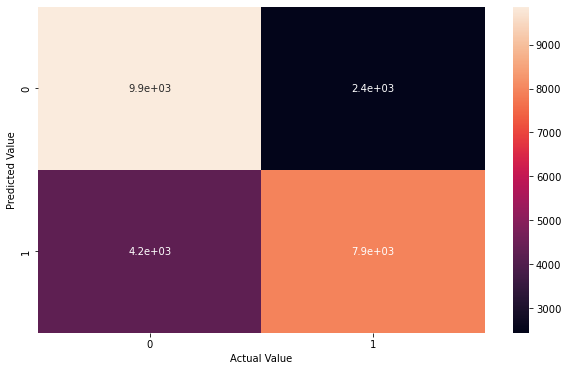

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")

In [114]:
from sklearn.metrics import accuracy_score
score=accuracy_score(yts,predictions)
score

0.7270612244897959

# Saving Model

In [155]:
# save the model

torch.save(model,'heart_attack.pt')

In [156]:
#loading a neural model
model=torch.load('heart_attack.pt')

In [74]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=11, out_features=30, bias=True)
  (f_connected2): Linear(in_features=30, out_features=30, bias=True)
  (f_connected3): Linear(in_features=30, out_features=30, bias=True)
  (out): Linear(in_features=30, out_features=2, bias=True)
)

In [75]:
# Prediction of new data point 
list(df.iloc[0,:-1])  
# took the values of the data for prediction
check1=[33.0, 2.0, 4.0, 115.0, 133.0, 1.0, 4.0, 150.0, 1.0, 2.3, 0.0, 0.0, 1.0]
check_final=torch.tensor(check1)
with torch.no_grad(): #now we dont req gradient as its out final outcome 
    y_pred=model(data)
    print(y_pred)
    print(y_pred.argmax().item())
    print(np.where(y_pred.argmax().item()==1,"Heart Attack","No Heart Attack "))

tensor([165.7007, 166.5277])
1
Heart Attack
